## **Objective**

To create a model that generates images that look similar to handwritten Arabic digits


## **Data**

Obtained from Arabic Handwritten Digits Dataset | Kaggle, original source unknown.

## **Problem Statement**

You are working with a team that is developing an online game where users travel to an alien planet and try to learn the language, culture, religion, and science of the planetary society. The game designers would like a set of characters to represent digits, different from any of those used on earth. To develop this set of characters, your job is to train a GAN on Arabic Handwritten digits and use it to create new symbols for representing digits on an alien planet.


# Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# loading the dataset into  pandas dataframe. 
#Convert the dataframe to a numpy array using pandas.values. 
test_image = pd.read_csv('csvTestImages 10k x 784.csv').values
test_label = pd.read_csv('csvTestLabel 10k x 1.csv').values
train_image = pd.read_csv('csvTrainImages 60k x 784.csv').values
train_label = pd.read_csv('csvTrainLabel 60k x 1.csv').values

#Print the shape of the data.
print('the shape of the test images',test_image.shape)
print('the shape of the test label',test_label.shape)
print('the shape of the train images',train_image.shape)
print('the shape of the train label',train_label.shape)

# Normalize and reshape the image data.
# Normalize by dividing pixel values by 255.
train_image = train_image / 255.0
test_image  = test_image / 255.0

# Reshape images to 28 x 28 images
train_image = train_image.reshape(-1, 28, 28)

test_image  = test_image.reshape(-1, 28, 28)
# Reshape label to 2d arrays
test_label = test_label.reshape(-1,1)
train_label = train_label.reshape(-1,1)


#Print again the shape of the data to check reshaping
print('\nAfter reshaping data')
print('the shape of the test images',test_image.shape)
print('the shape of the train images',train_image.shape)
print('the shape of the test label',test_label.shape)
print('the shape of the train label',train_label.shape)


the shape of the test images (9999, 784)
the shape of the test label (9999, 1)
the shape of the train images (59999, 784)
the shape of the train label (59999, 1)

After reshaping data
the shape of the test images (9999, 28, 28)
the shape of the train images (59999, 28, 28)
the shape of the test label (9999, 1)
the shape of the train label (59999, 1)


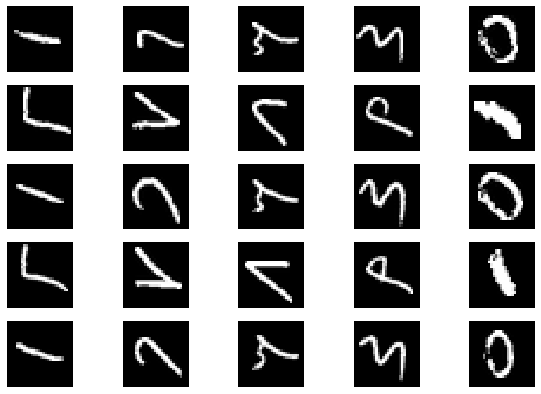

In [2]:
#Use matplotlib.plot.imshow and matplotlib.plot.subplot to give a plot of the first twenty five images using the 'gray' colour map. 
plt.figure(figsize=(10, 7))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_image[i], cmap='gray')
    plt.axis('off')
plt.show()

# Modeling

In [3]:
train_image = np.expand_dims(train_image, axis=-1)  
test_image  = np.expand_dims(test_image, axis=-1)   
print('\nAfter reshaping data')
print('the shape of the test images',test_image.shape)
print('the shape of the train images',train_image.shape)


After reshaping data
the shape of the test images (9999, 28, 28, 1)
the shape of the train images (59999, 28, 28, 1)


In [4]:
# Import the required library functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import LeakyReLU,BatchNormalization
from tensorflow.keras.layers import Conv2D, UpSampling2D,Conv2DTranspose
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers

In [5]:
X_train = train_image
X_test = test_image

y_train = train_label
y_test = test_label

In [6]:
# Function to generate real data samples
def generate_real_samples(X, n_samples):
    idx = np.random.randint(0, X.shape[0], n_samples)
    X_real = X[idx]
    y_real = np.ones((n_samples, 1))
    return X_real, y_real

In [7]:
# Function to generate latent points
def generate_latent_points(latent_dim, n_samples):
    return np.random.randn(n_samples, latent_dim)

In [38]:
# Define generator

def define_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_dim=latent_dim))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(126, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(28*28, activation='relu'))
    model.add(layers.Reshape((28,28,1)))
    return model

# example instantiation
latent_dim = 100
generator = define_generator(latent_dim)
generator.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               51712     
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
dense_40 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
dense_41 (Dense)             (None, 126)               32382     
_________________________________________________________________
batch_normalization_22 (Batc (None, 126)               504       
_________________________________________________________________
dense_42 (Dense)             (None, 784)             

In [39]:
# Generate fake samples
def generate_fake_samples(generator, latent_dim, n_samples):
    z_input = generate_latent_points(latent_dim, n_samples)
    X_fake = generator.predict(z_input, verbose=0)
    y_fake = np.zeros((n_samples, 1))
    return X_fake, y_fake

In [40]:
# Build Discriminator

def define_discriminator(in_shape=(28,28,1)):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=in_shape))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

discriminator = define_discriminator()
discriminator.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_44 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 129       
Total params: 467,713
Trainable params: 467,713
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Define GAN 
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

gan_model = define_gan(generator, discriminator)

In [46]:
# Training function
def train_gan(generator, discriminator, gan_model, X, latent_dim, n_epochs=5000, n_batch=64):
    half_batch = n_batch // 2
    for epoch in range(n_epochs):
        # real
        X_real, y_real = generate_real_samples(X, half_batch)
        d_loss_real, _ = discriminator.train_on_batch(X_real, y_real)
        # fake
        X_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)
        d_loss_fake, _ = discriminator.train_on_batch(X_fake, y_fake)
        # train generator via GAN
        z_input = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        g_loss = gan_model.train_on_batch(z_input, y_gan)
        # log
        if (epoch+1) % 1000 == 0:
            print(f"Epoch {epoch+1}, d_real={d_loss_real:.3f}, d_fake={d_loss_fake:.3f}, g={g_loss:.3f}")

In [48]:
# Fit the GAN
train_gan(generator, discriminator, gan_model, X_train, latent_dim, n_epochs=5000, n_batch=64)

Epoch 1000, d_real=0.042, d_fake=0.002, g=6.649
Epoch 2000, d_real=0.060, d_fake=0.001, g=2.521
Epoch 3000, d_real=0.000, d_fake=0.001, g=1.696
Epoch 4000, d_real=0.009, d_fake=0.002, g=6.650
Epoch 5000, d_real=0.000, d_fake=0.017, g=4.760


# Conclusion

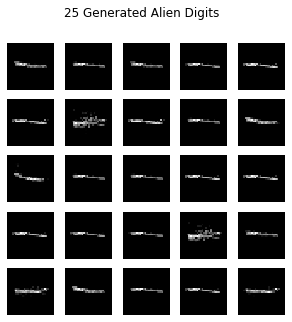

In [49]:
# Generate & plot 25 fake images
X_fake, _ = generate_fake_samples(generator, latent_dim, 25)
fig, axes = plt.subplots(5, 5, figsize=(5,5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_fake[i, :, :, 0], cmap='gray')
    ax.axis('off')
plt.suptitle('25 Generated Alien Digits')
plt.show()

We tried to train a bit longer (More epochs) to see if G can push g_loss further down.

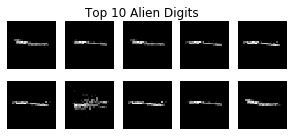

In [50]:
# Select & display best 10 images

fig, axes = plt.subplots(2, 5, figsize=(5,2))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_fake[i, :, :, 0], cmap='gray')
    ax.axis('off')
plt.suptitle('Top 10 Alien Digits')
plt.show()

The images do not look like something aliens might use to represent digits because they look quite far from the original images. This was due to computational inefficiencies as such we could not generate those images representing the digits